In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv('Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [51]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [53]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


(array([28., 22., 27., 22., 21., 35., 24., 21.]),
 array([  0.7   ,  37.6625,  74.625 , 111.5875, 148.55  , 185.5125,
        222.475 , 259.4375, 296.4   ]),
 <BarContainer object of 8 artists>)

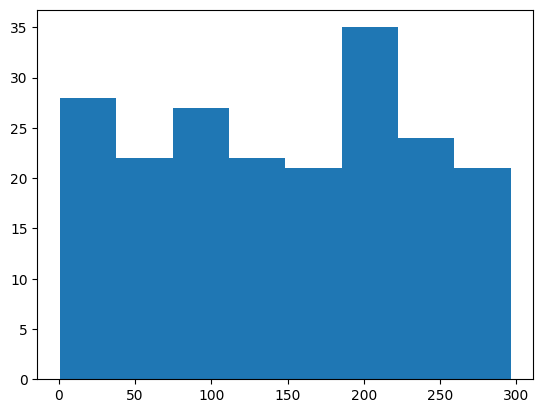

In [54]:
import math

k =  1 + math.log2(len(data))
plt.hist(data['TV'],bins=int(k))

(array([37., 25., 24., 20., 26., 22., 25., 21.]),
 array([ 0. ,  6.2, 12.4, 18.6, 24.8, 31. , 37.2, 43.4, 49.6]),
 <BarContainer object of 8 artists>)

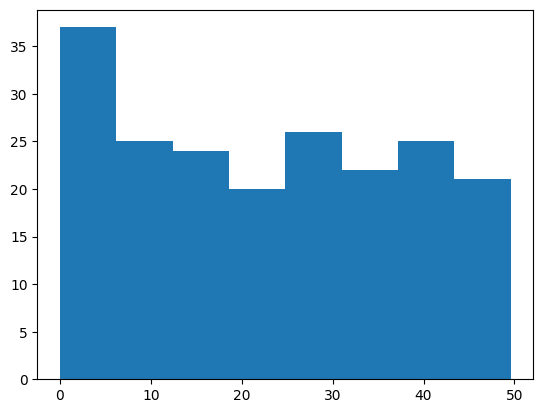

In [55]:
plt.hist(data['Radio'],bins=int(k))

In [56]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [57]:
X = data.drop(['Sales'], axis=1)
y = data['Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

#instancio el modelo de regresión lineal
model = LinearRegression()

#entrenar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

#realiza predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

In [59]:
# evaluar el modelo
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.26870832909143


In [60]:
# calcular el coeficiente de determinación R^2

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

R^2 Score: 0.9284386611923977


Text(0, 0.5, 'Predicted Sales')

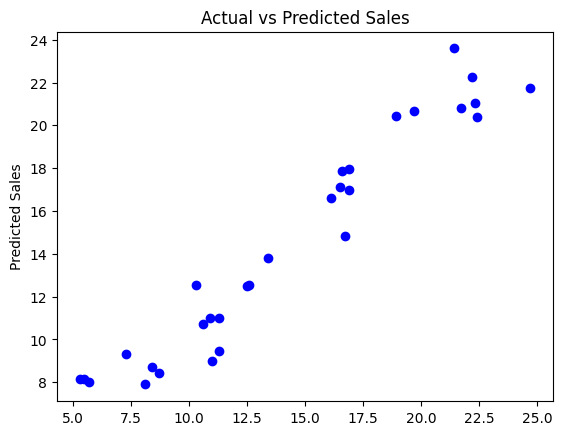

In [61]:
# Visualizar los resultados 
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs Predicted Sales')
plt.ylabel('Predicted Sales')